<a href="https://colab.research.google.com/github/aeryy-afk/Linear_Regretion/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ==========================================
# 2. LOAD DATASET
# ==========================================
df = pd.read_csv("/content/diabetes.csv")

Link Dataset
---
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

---
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2


In [116]:
df = pd.read_csv("diabetes.csv")
print("Dataset head:\n", df.head())

Dataset head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [117]:
print("\nKelas target value counts:")
print(df.iloc[:, -1].value_counts())


Kelas target value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


In [118]:
# ==========================================
# 3. PREPROCESSING DATA
# ==========================================

# a. Pisahkan fitur dan target
X = df.iloc[:, :-1]   # semua kolom kecuali kolom terakhir
y = df.iloc[:, -1]    # kolom terakhir sebagai target

# b. Tangani missing value (hapus baris yang mengandung NaN)
X = X.dropna()
y = y.loc[X.index]

# c. Scaling data (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
# ==========================================
# 4. SPLIT DATA (TRAIN & TEST)
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)


In [120]:
# ==========================================
# 5. MODELING SVM (RBF KERNEL)
# ==========================================
model = SVC(kernel="rbf", random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

RBF (Radial Basis Function),

---
karena hubungan antar fitur tidak linear, data tumpang tindih, dan RBF memberikan akurasi paling tinggi dibanding kernel lain.

In [121]:
# ==========================================
# 6. EVALUASI MODEL
# ==========================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("=== Hasil Evaluasi SVM ===")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", cm)

=== Hasil Evaluasi SVM ===
Accuracy : 0.7792207792207793
Precision: 0.7380952380952381
Recall   : 0.5740740740740741
F1 Score : 0.6458333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix:
 [[89 11]
 [23 31]]


In [122]:
#agar lebih mudah tahu over atau underfitting
train_pred = model.predict(X_train)
test_pred  = model.predict(X_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_pred)
test_acc  = accuracy_score(y_test, test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)


Train Accuracy : 0.8127035830618893
Test Accuracy  : 0.7792207792207793


tidak over sedikit under. tapi prediksi untuk class 1 kurang bagus

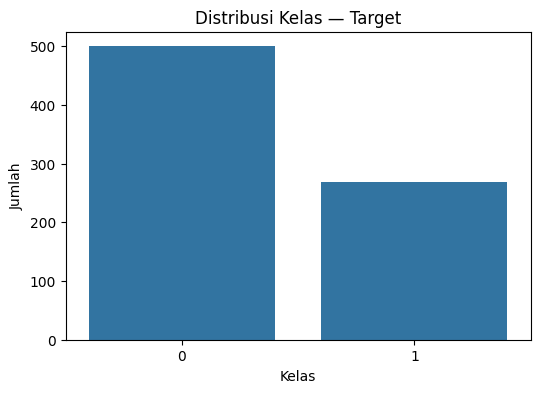

In [123]:
# 1. Distribusi kelas target
plt.figure(figsize=(6,4))
sns.countplot(x = df.iloc[:, -1])
plt.title("Distribusi Kelas — Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()


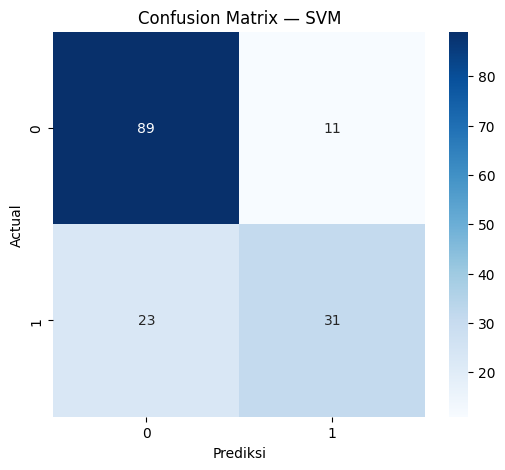

In [124]:
# 2. Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — SVM")
plt.xlabel("Prediksi")
plt.ylabel("Actual")
plt.show()